In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ener = 14#12
ang = 11#31
name = "mc-data/mu-by-pe" + str(ener) + "-" + str(ang) + ".dat"

tmp = np.loadtxt(name, float)
x = [] #np.zeros(len(tmp), float)
y = [] #np.zeros(len(tmp), float)

for i in range(len(tmp)):
    if tmp[i, 7] == 64.:#99.: # Showers with zenith angle of ~1.3°
        x.append( tmp[i, 4] * 1e-5 )#.01
        y.append( tmp[i, 5] * 1e-5 )#.01        

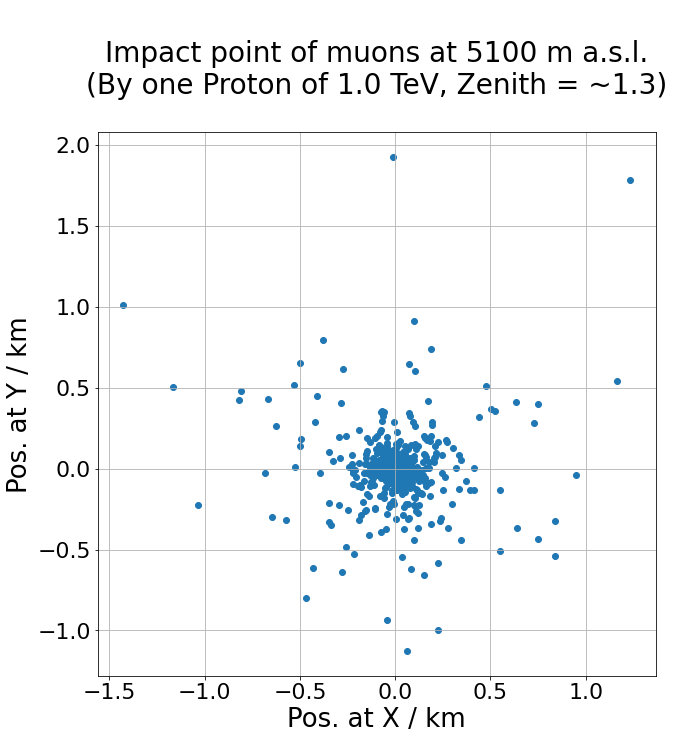

In [3]:
plt.figure(figsize=(10,10))

plt.scatter(x, y)

plt.title("\nImpact point of muons at 5100 m a.s.l.\n(By one Proton of 1.0 TeV, Zenith = ~1.3)\n", fontsize=28)
plt.xlabel("Pos. at X / km", fontsize=26)
plt.ylabel("Pos. at Y / km", fontsize=26)

#lenlim = 2.1

#plt.xlim(-lenlim, lenlim)
#plt.ylim(-lenlim, lenlim)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.grid()

plt.show()

In [4]:
ener = 14#12
ang = 11#31
name = "mc-data/mu-by-pe" + str(ener) + "-" + str(ang) + ".dat"

tmp = np.loadtxt(name, float)
tl = [] #np.zeros(len(tmp), float)

for i in range(len(tmp)):
    if tmp[i, 7] == 64.:#99.: #
        tl.append( tmp[i, 6] )
        
t = np.array(tl)

In [5]:
mint = np.amin(t)
maxt = np.amax(t)

print(mint, maxt)

hist_t = np.zeros(int(maxt-mint)+1, float)

for i in range(len(t)):
    tmp = int(t[i] - mint)
    hist_t[tmp] += 1

nelem = (maxt - mint)/10.
hist_delt = np.zeros(int(nelem+1), float)
count_10n = 0
index = 0

for i in range(len(hist_t)):
    hist_delt[index] += hist_t[i]
    count_10n += 1
    if count_10n == 10:
        index += 1
        count_10n = 0

359545.0 365330.0


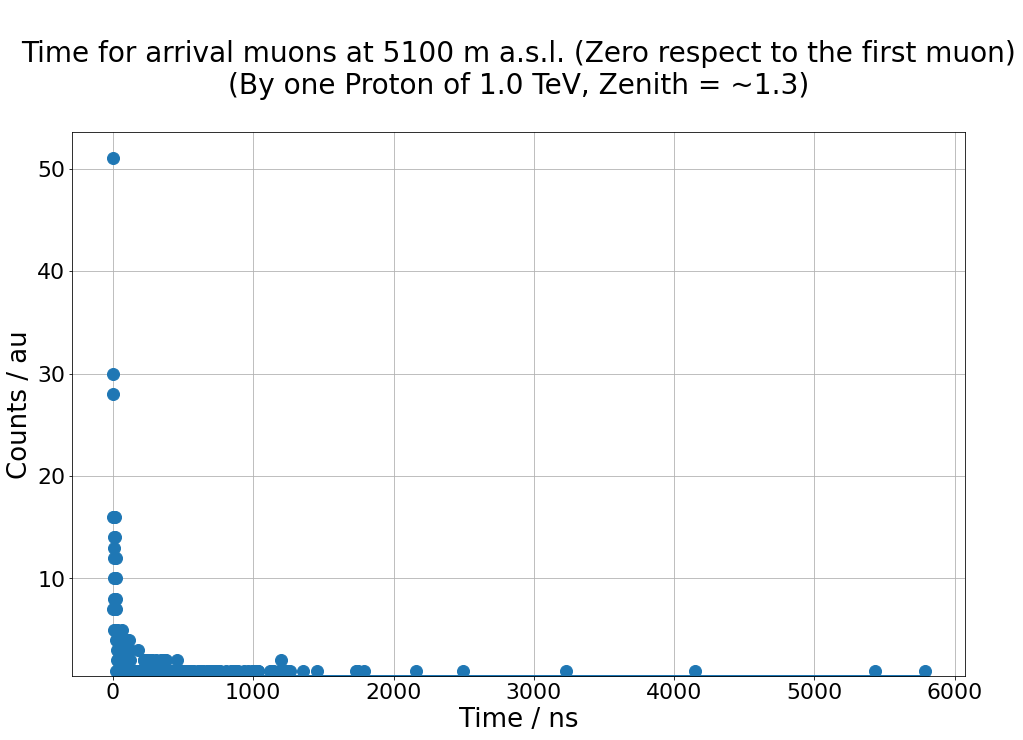

In [6]:
plt.figure(figsize=(16,10))

plt.plot(hist_t, "o", markersize=12)

plt.title("\nTime for arrival muons at 5100 m a.s.l. (Zero respect to the first muon)\n(By one Proton of 1.0 TeV, Zenith = ~1.3)\n", fontsize=28)
plt.xlabel("Time / ns", fontsize=26)
plt.ylabel("Counts / au", fontsize=26)

plt.ylim(0.5)

plt.grid()

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.show()

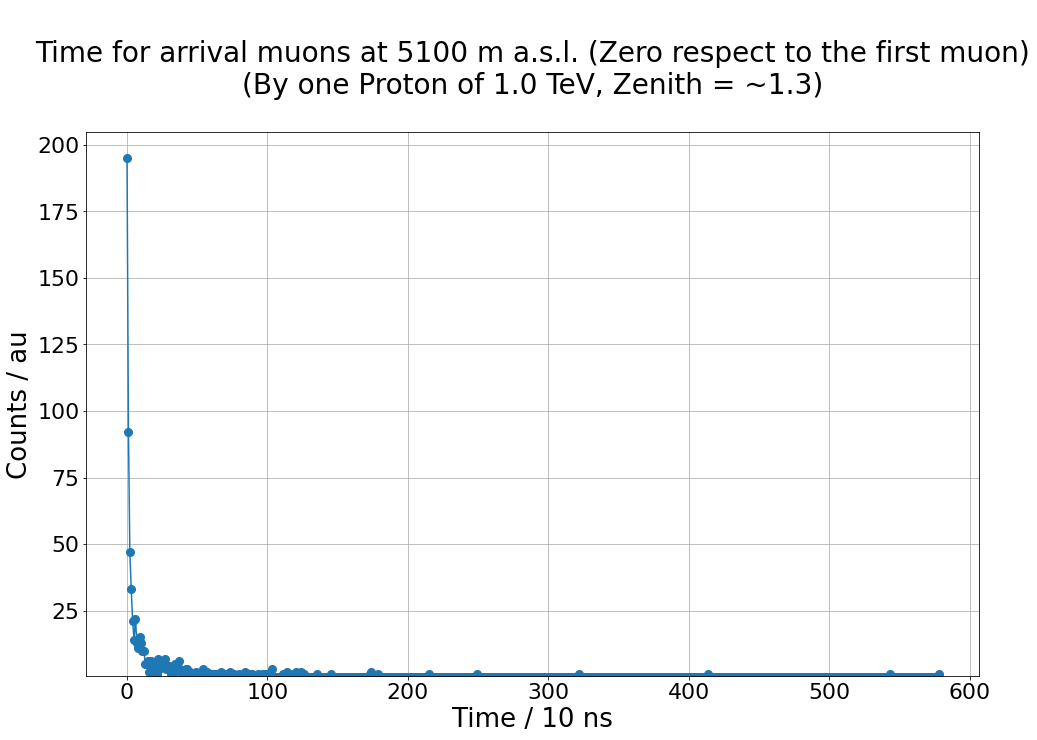

In [10]:
plt.figure(figsize=(16,10))

plt.plot(hist_delt, "-o", markersize=8)

plt.title("\nTime for arrival muons at 5100 m a.s.l. (Zero respect to the first muon)\n(By one Proton of 1.0 TeV, Zenith = ~1.3)\n", fontsize=28)
plt.xlabel("Time / 10 ns", fontsize=26)
plt.ylabel("Counts / au", fontsize=26)

plt.ylim(0.5)
#plt.xlim(0,25)

plt.grid()

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.show()

# Analysis per meter square


In [8]:
ener = 14#12
ang = 11#31
name = "mc-data/mu-by-pe" + str(ener) + "-" + str(ang) + ".dat"

tmp = np.loadtxt(name, float)
posX = []
posY = []

# Getting positions
for i in range(len(tmp)):
    if tmp[i, 7] == 64.:#99.: #
        posX.append( tmp[i, 4] * .01 ) # meters
        posY.append( tmp[i, 5] * .01 ) # meters


# ==============================
# Doing density per meter square
# ==============================

#densare = np.zeros(int(14e5), float)
densrad = np.zeros(300, float)

for i in range(len(posX)):
    radius = np.sqrt( posX[i]*posX[i] + posY[i]*posY[i] )
    area = np.pi*radius*radius
    densrad[ int(radius/10.) ] += 1
    #densare[ int(area/10.) ] += 1

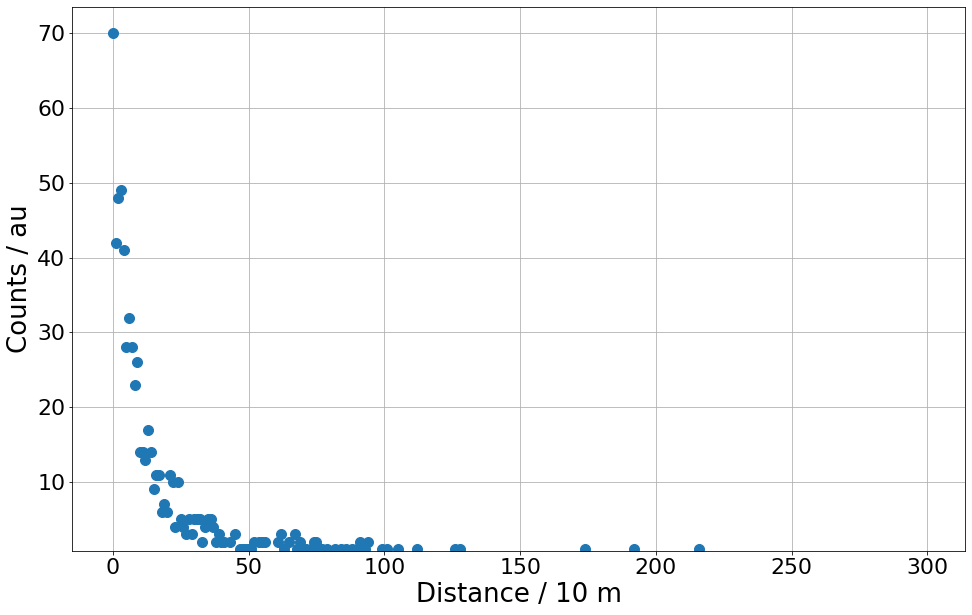

In [10]:
#xdist = [i for i in range()]

plt.figure(figsize=(16, 10))

plt.plot(densrad, "-o", markersize=8)

plt.xlabel("Distance / 10 m", fontsize=26)
plt.ylabel("Counts / au", fontsize=26)

plt.ylim(0.8)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.grid()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ener = 12#14#12
ang = 31#11#31
name = "mc-data/mu-by-pe" + str(ener) + "-" + str(ang) + ".dat"

tmp = np.loadtxt(name, float)
posX = []
posY = []

# Getting positions
for i in range(len(tmp)):
    if tmp[i, 7] == 99.:#64.:#99.: #
        posX.append( tmp[i, 4] * .01 ) # meters
        posY.append( tmp[i, 5] * .01 ) # meters


# ==============================
# Doing density per meter square
# ==============================

densare = np.zeros(int(2e6), float)

for i in range(len(posX)):
    radius = np.sqrt( posX[i]*posX[i] + posY[i]*posY[i] )
    area = np.pi*radius*radius
    densare[ int(area/10.) ] += 1

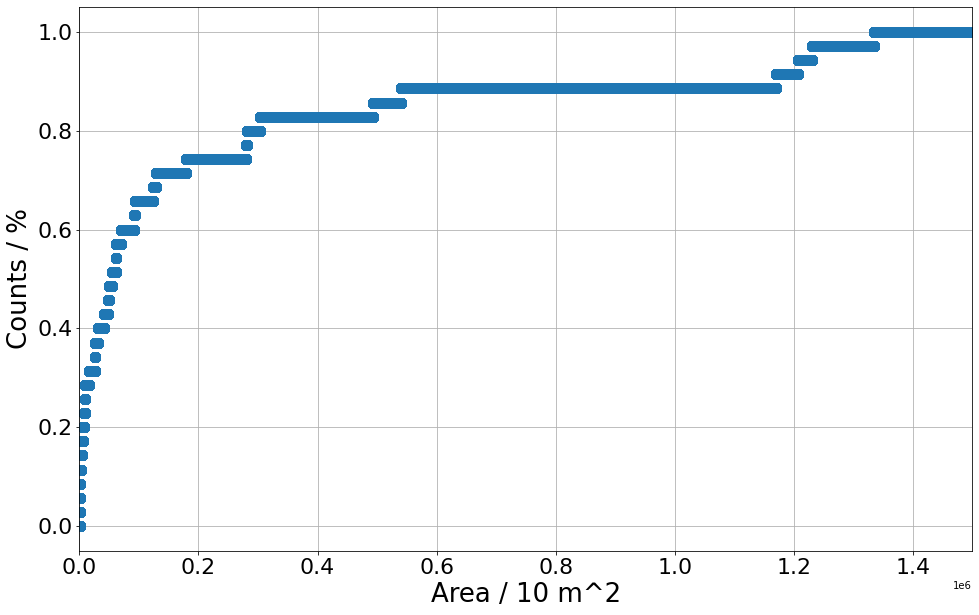

In [2]:
plt.figure(figsize=(16,10))

plt.plot(np.cumsum(densare)/np.amax(np.cumsum(densare)), "o", markersize=10)

#plt.title("\nTime for arrival muons at 5100 m a.s.l. (Zero respect to the first muon)\n(By one Proton of 1.0 TeV, Zenith = ~1.3)\n", fontsize=28)
plt.xlabel("Area / 10 m^2", fontsize=26)
plt.ylabel("Counts / %", fontsize=26)

#plt.ylim(0,100)
plt.xlim(0, 1.5e6)

plt.grid()

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.show()